In [1]:
pip install git+https://github.com/tweepy/tweepy.git

  Cloning https://github.com/tweepy/tweepy.git to /tmp/pip-req-build-cgl13pr0
  Running command git clone --filter=blob:none --quiet https://github.com/tweepy/tweepy.git /tmp/pip-req-build-cgl13pr0
  Resolved https://github.com/tweepy/tweepy.git to commit 91a41c6e1c955d278c370d51d5cf43b05f7cd979
  Preparing metadata (setup.py) ... done


In [2]:
import tweepy
import pandas as pd

consumer_key = "87H3wFmVZtIwYrjemVdw4m2Qa" #Your API/Consumer key
consumer_secret = "SKHmppgEHdjhWo5UdAOuyccDELGema5KiNqZM2VFGBxi03sRLF" #Your API/Consumer Secret Key
access_token = "1700453373634592768-5RVAv9mEIRuFpnPBwbWhO9XAmjXnFz"    #Your Access token key
access_token_secret = "XipiSAvOjrOyIJRdCZkOnrmvZM87b5OIGlJZYiyiY5bO9" #Your Access token Secret key

#Pass in our twitter API authentication key
auth = tweepy.OAuth1UserHandler(
    consumer_key, consumer_secret,
    access_token, access_token_secret
)

#Instantiate the tweepy API
api = tweepy.API(auth, wait_on_rate_limit=True)



In [ ]:

search_query = "Ceylon Tea -filter:retweets"
no_of_tweets = 10

try:
    #The number of tweets we want to retrieved from the search
    tweets = api.search_tweets(q=search_query, lang="en", count=no_of_tweets, tweet_mode ='extended')
    print({"tweets": [
                {
                    "text": tweet.text,
                    "user": tweet.user.screen_name,
                    "created_at": tweet.created_at.isoformat(),
                }
                for tweet in tweets
            ]})
except BaseException as e:
    print('Status Failed On,',str(e))

Status Failed On, 403 Forbidden
453 - You currently have access to a subset of X API V2 endpoints and limited v1.1 endpoints (e.g. media post, oauth) only. If you need access to this endpoint, you may need a different access level. You can learn more here: https://developer.x.com/en/portal/product


In [ ]:
 try:
        query = "Ceylon Tea -filter:retweets"
        tweets = twitter_api.search_tweets(q=query, lang="en", count=10)
        if not tweets:
            return {"message": "No tweets found about Ceylon Tea."}

        return {
            "tweets": [
                {
                    "text": tweet.text,
                    "user": tweet.user.screen_name,
                    "created_at": tweet.created_at.isoformat(),
                }
                for tweet in tweets
            ]
        }
    except Exception as e:
        raise HTTPException(status_code=500, detail=str(e))

# **Google Trends Analysis (For different Tea types)**

In [3]:
!pip install pytrends


In [ ]:
from pytrends.request import TrendReq

# Set up the pytrends request
pytrends = TrendReq(hl='en-US', tz=360)


In [ ]:
# Build the payload for "Ceylon Tea"
pytrends.build_payload(['Ceylon Tea'], timeframe='today 5-y', geo='', gprop='')

# Fetch interest over time
interest_over_time = pytrends.interest_over_time()

# Display the result
print(interest_over_time)


            Ceylon Tea  isPartial
date                             
2019-11-24          36      False
2019-12-01          39      False
2019-12-08          37      False
2019-12-15          42      False
2019-12-22          44      False
...                ...        ...
2024-10-27          50      False
2024-11-03          48      False
2024-11-10          53      False
2024-11-17          54      False
2024-11-24          53       True

[262 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/pytrends/request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)


/usr/local/lib/python3.10/dist-packages/pytrends/request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)
/usr/local/lib/python3.10/dist-packages/pytrends/request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)
/usr/local/lib/python3.10/dist-packages/pytrends/request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('fut

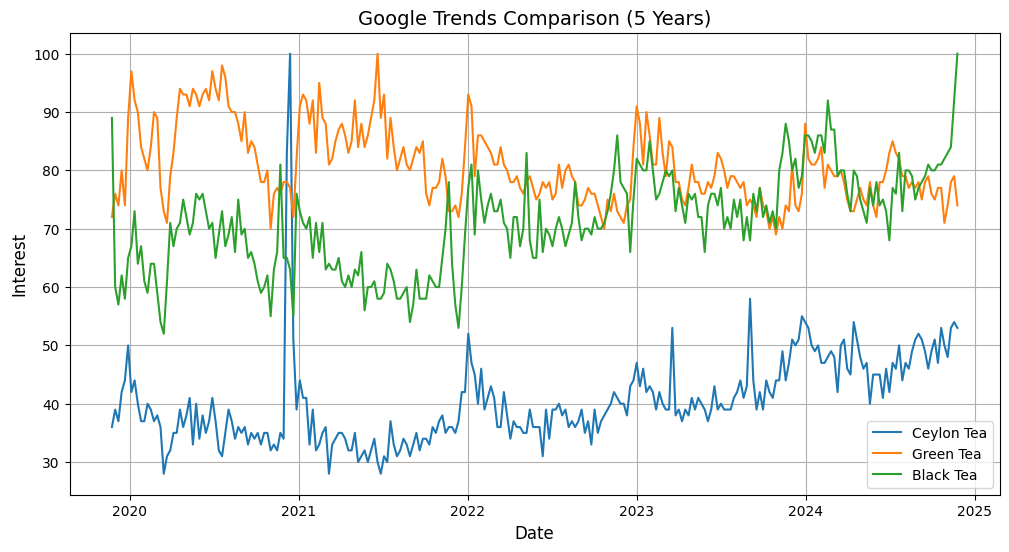

In [ ]:
import time
import pandas as pd
import matplotlib.pyplot as plt
from pytrends.request import TrendReq

# Initialize pytrends
pytrends = TrendReq()

# Build payloads for topics
topics = ["Ceylon Tea", "Green Tea", "Black Tea"]
data = {}

for topic in topics:
    pytrends.build_payload([topic], timeframe='today 5-y', geo='', gprop='')
    interest_over_time = pytrends.interest_over_time()
    data[topic] = interest_over_time[topic]
    time.sleep(10)  # Add a delay of 10 seconds between requests

# Combine data into a single DataFrame
trend_data = pd.concat(data, axis=1)

# Plot trends
plt.figure(figsize=(12, 6))
for topic in topics:
    plt.plot(trend_data.index, trend_data[topic], label=topic)

plt.title("Google Trends Comparison (5 Years)", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Interest", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# # Fetch related queries
# related_queries = pytrends.related_queries()

# # Display related queries for "Ceylon Tea"
# if 'Ceylon Tea' in related_queries:
#     queries = related_queries['Ceylon Tea']
#     if 'top' in queries and queries['top'] is not None and not queries['top'].empty:
#         print("Top related queries:")
#         print(queries['top'])
#     else:
#         print("No top related queries found.")

#     if 'rising' in queries and queries['rising'] is not None and not queries['rising'].empty:
#         print("\nRising related queries:")
#         print(queries['rising'])
#     else:
#         print("No rising related queries found.")
# else:
#     print("No related queries available for 'Ceylon Tea'.")


# **Twitter Trends and Impressions Analysis**

In [4]:
import http.client

conn = http.client.HTTPSConnection("twitter241.p.rapidapi.com")

headers = {
    'x-rapidapi-key': "6496790f8bmsha07b1cf7256f9c2p1995fbjsne7ca8be11817",
    'x-rapidapi-host': "twitter241.p.rapidapi.com"
}

conn.request("GET", "/job-details?jobId=1766819008026931200", headers=headers)

res = conn.getresponse()
data = res.read()

print(data.decode("utf-8"))

{"result":{"jobData":{"id":"QXBpSm9iUmVzdWx0czoxNzY2ODE5MDA4MDI2OTMxMjAw","rest_id":"1766819008026931200","result":{"__typename":"ApiJob","company_profile_results":{"id":"QXBpQ29tcGFueVByb2ZpbGVSZXN1bHRzOjE3NTA2NTc3MjQwNDY3NzQyNzI=","rest_id":"1750657724046774272","result":{"__typename":"ApiCompanyProfile","core":{"name":"Devoteam"},"id":"QXBpQ29tcGFueVByb2ZpbGU6MTc1MDY1NzcyNDA0Njc3NDI3Mg==","logo":{"normal_url":"https://pbs.twimg.com/profile_images/1082991650794889217/h4Bo8Z5E_normal.jpg"},"rest_id":"1750657724046774272"}},"core":{"external_url":"https://jobs.smartrecruiters.com/Devoteam/743999972803753-senior-python-developer","featured":0,"job_description":"{\"blocks\": [{\"data\": null, \"text\": \"Company Description\", \"type\": \"header-one\", \"entityRanges\": [], \"inlineStyleRanges\": null, \"_passthroughFields\": {}}, {\"data\": null, \"text\": \"\", \"type\": \"unstyled\", \"entityRanges\": [], \"inlineStyleRanges\": [], \"_passthroughFields\": {}}, {\"data\": null, \"text\

In [ ]:
import http.client
import json

conn = http.client.HTTPSConnection("twitter241.p.rapidapi.com")

headers = {
    'x-rapidapi-key': "6496790f8bmsha07b1cf7256f9c2p1995fbjsne7ca8be11817",
    'x-rapidapi-host': "twitter241.p.rapidapi.com"
}

conn.request("GET", "/highlights?user=877807935493033984&count=20", headers=headers)

res = conn.getresponse()
data = res.read()
parsed_data = json.loads(data)
print(parsed_data)

{'cursor': {'bottom': 'DAAHCgABGdFGRRq__-wLAAIAAAATMTgxMTY4NzI5Nzc2ODI4MzYwMAgAAwAAAAIAAA', 'top': 'DAAHCgABGdFGRRrAAAELAAIAAAATMTgxNjUwMzQzOTY1NzYxNTMxNAgAAwAAAAEAAA'}, 'result': {'timeline': {'instructions': [{'type': 'TimelineClearCache'}, {'entries': [{'content': {'__typename': 'TimelineTimelineItem', 'clientEventInfo': {'component': 'highlights', 'element': 'tweet'}, 'entryType': 'TimelineTimelineItem', 'itemContent': {'__typename': 'TimelineTweet', 'itemType': 'TimelineTweet', 'tweetDisplayType': 'Tweet', 'tweet_results': {'result': {'__typename': 'Tweet', 'core': {'user_results': {'result': {'__typename': 'User', 'affiliates_highlighted_label': {}, 'has_graduated_access': True, 'id': 'VXNlcjo4Nzc4MDc5MzU0OTMwMzM5ODQ=', 'is_blue_verified': True, 'legacy': {'can_dm': False, 'can_media_tag': True, 'created_at': 'Thu Jun 22 08:38:15 +0000 2017', 'default_profile': False, 'default_profile_image': False, 'description': 'The world’s leading blockchain ecosystem and digital asset exchan

In [26]:
import http.client

conn = http.client.HTTPSConnection("twitter241.p.rapidapi.com")

headers = {
    'x-rapidapi-key': "6496790f8bmsha07b1cf7256f9c2p1995fbjsne7ca8be11817",
    'x-rapidapi-host': "twitter241.p.rapidapi.com"
}

conn.request("GET", "/search-v2?type=Top&count=20&query=tea", headers=headers)

res = conn.getresponse()
data = res.read()

print(data.decode("utf-8"))

{"cursor":{"bottom":"DAACCgACGdljtaQAJxAKAAMZ2WO1o__Y8AgABAAAAAILAAUAAADcRW1QQzZ3QUFBZlEvZ0dKTjB2R3AvQUFBQUJJWkJqYjM2dG9oTHhsc3ZPWVpWNEE3R1VXalp5WmEwVW9aMVVCVnc1YmdIQm5SbFBZcEdvQzRHZFFWZmZ2YVlaWVpwZWxiM2RzUXhSbEhSajlUMWtDN0dXYjRCQlNiQUVVWmhueXpxWllBNUJuVWFvTDZsNEJwR2RSbXFnd2FvRndabjZ6UFhSZGhOeG1aTWtHekdnQ2tHZGhKV3R1V3dGSVpWWExlZGRjd2NSbkNvYklRRnhENkdVOVhRNlVhNFE0PQgABgAAAAAIAAcAAAAADAAICgABGQY29-raIS8AAAA","top":"DAACCgACGdljtaQAJxAKAAMZ2WO1o__Y8AgABAAAAAELAAUAAADcRW1QQzZ3QUFBZlEvZ0dKTjB2R3AvQUFBQUJJWkJqYjM2dG9oTHhsc3ZPWVpWNEE3R1VXalp5WmEwVW9aMVVCVnc1YmdIQm5SbFBZcEdvQzRHZFFWZmZ2YVlaWVpwZWxiM2RzUXhSbEhSajlUMWtDN0dXYjRCQlNiQUVVWmhueXpxWllBNUJuVWFvTDZsNEJwR2RSbXFnd2FvRndabjZ6UFhSZGhOeG1aTWtHekdnQ2tHZGhKV3R1V3dGSVpWWExlZGRjd2NSbkNvYklRRnhENkdVOVhRNlVhNFE0PQgABgAAAAAIAAcAAAAADAAICgABGQY29-raIS8AAAA"},"result":{"timeline":{"instructions":[{"entries":[{"content":{"__typename":"TimelineTimelineModule","clientEventInfo":{"component":"user_module","element":"module"},"displayType":"Carousel","en

In [27]:
import json

def extract_posts_from_data(data_string):
    """
    Extracts post contents from a JSON string.

    Args:
        data_string (str): JSON string containing post data.

    Returns:
        list of str: List of post contents extracted from the data.
    """
    try:
        # Parse the JSON string into a Python dictionary
        data = json.loads(data_string)

        # Navigate to the timeline entries
        instructions = data.get("result", {}).get("timeline", {}).get("instructions", [])

        posts = []
        for instruction in instructions:
            entries = instruction.get("entries", [])
            for entry in entries:
                content = entry.get("content", {})

                # Extracting relevant content (modify the key path as per structure)
                if content.get("__typename") == "TimelineTimelineModule":
                    items = content.get("items", [])
                    for item in items:
                        user_content = item.get("item", {}).get("itemContent", {}).get("user_results", {}).get("result", {}).get("legacy", {})
                        description = user_content.get("description", "")
                        if description:
                            posts.append(description)

        return posts
    except json.JSONDecodeError as e:
        print(f"Error decoding JSON: {e}")
        return []
    except Exception as e:
        print(f"Error processing data: {e}")
        return []

In [28]:
p_data = data.decode("utf-8")

In [29]:
posts = extract_posts_from_data(p_data)
print(posts)

['♡ 26 | UK | 🔞 Minors DNI ♡ Cosplayer, Crafter, MUA ♡', '18 year old, crypto whale, get your Tea, G', 'scorpio ☉ aries ☾ cancer ↑', 'cu-$TEA memecoin on #Solana 🍃💸 3M in Telegram Communi-TEA', '@ufc undisputed & undefeated lightweight Champ 29:0', 'a world traveler with 10+ years of entrepreneurship in international sme. semi-retired womanizer. porsche enthusiast. crypto bs. foodie.', '🌴 26 years old Cali girl living in Vegas 🎰 Model/Content creator😈Girls just wanna have fun(ds)🤪 👻Qweentea420', 'The official X account for the Trump campaign. Together, we will MAKE AMERICA GREAT AGAIN! 🇺🇸', 'Real tea + Real Taste + Real Tweets = Gold 💛']


In [30]:
def extract_posts_with_dates(data_string):
    """
    Extracts post contents and their published dates from a JSON string.

    Args:
        data_string (str): JSON string containing post data.

    Returns:
        list of dict: List of dictionaries with 'content' and 'date' keys.
    """
    try:
        # Parse the JSON string into a Python dictionary
        data = json.loads(data_string)

        # Navigate to the timeline entries
        instructions = data.get("result", {}).get("timeline", {}).get("instructions", [])

        posts_with_dates = []
        for instruction in instructions:
            entries = instruction.get("entries", [])
            for entry in entries:
                content = entry.get("content", {})

                # Check if the content is of the desired type
                if content.get("__typename") == "TimelineTimelineModule":
                    items = content.get("items", [])
                    for item in items:
                        user_content = item.get("item", {}).get("itemContent", {}).get("user_results", {}).get("result", {}).get("legacy", {})

                        # Extract content and date
                        description = user_content.get("description", "")
                        created_at = user_content.get("created_at", "")

                        if description and created_at:
                            posts_with_dates.append({
                                "content": description,
                                "date": created_at
                            })

        return posts_with_dates
    except json.JSONDecodeError as e:
        print(f"Error decoding JSON: {e}")
        return []
    except Exception as e:
        print(f"Error processing data: {e}")
        return []

In [31]:
posts2 = extract_posts_with_dates(p_data)
print(posts2)

[{'content': '♡ 26 | UK | 🔞 Minors DNI ♡ Cosplayer, Crafter, MUA ♡', 'date': 'Mon Mar 07 15:01:57 +0000 2016'}, {'content': '18 year old, crypto whale, get your Tea, G', 'date': 'Thu Aug 03 20:27:48 +0000 2023'}, {'content': 'scorpio ☉ aries ☾ cancer ↑', 'date': 'Tue Jul 11 06:36:55 +0000 2023'}, {'content': 'cu-$TEA memecoin on #Solana 🍃💸 3M in Telegram Communi-TEA', 'date': 'Sat Jun 22 19:15:00 +0000 2024'}, {'content': '@ufc undisputed & undefeated lightweight Champ 29:0', 'date': 'Mon Jan 02 03:15:00 +0000 2012'}, {'content': 'a world traveler with 10+ years of entrepreneurship in international sme. semi-retired womanizer. porsche enthusiast. crypto bs. foodie.', 'date': 'Tue Oct 05 03:16:40 +0000 2021'}, {'content': '🌴 26 years old Cali girl living in Vegas 🎰 Model/Content creator😈Girls just wanna have fun(ds)🤪 👻Qweentea420', 'date': 'Thu Dec 12 03:10:17 +0000 2019'}, {'content': 'The official X account for the Trump campaign. Together, we will MAKE AMERICA GREAT AGAIN! 🇺🇸', 'date

In [32]:
from collections import defaultdict
from datetime import datetime

def group_posts_by_year(posts):
    """
    Groups posts by year and counts the number of posts for each year.

    Args:
        posts (list): List of dictionaries, each containing 'content' and 'date' keys.

    Returns:
        dict: Dictionary where keys are years and values are the count of posts for that year.
    """
    year_counts = defaultdict(int)

    for post in posts:
        # Parse the date string to extract the year
        try:
            post_date = datetime.strptime(post['date'], '%a %b %d %H:%M:%S %z %Y')
            year = post_date.year
            year_counts[year] += 1
        except Exception as e:
            print(f"Error parsing date for post: {post}, Error: {e}")

    return dict(year_counts)

In [38]:
yearly_post_counts = group_posts_by_year(posts2)
print(yearly_post_counts)

{2016: 2, 2023: 2, 2024: 1, 2012: 2, 2021: 1, 2019: 1}


Instagram Search

In [37]:
import http.client

conn = http.client.HTTPSConnection("instagram243.p.rapidapi.com")

headers = {
    'x-rapidapi-key': "6496790f8bmsha07b1cf7256f9c2p1995fbjsne7ca8be11817",
    'x-rapidapi-host': "instagram243.p.rapidapi.com"
}

conn.request("GET", "/searchuser/insta", headers=headers)

res = conn.getresponse()
data = res.read()

print(data.decode("utf-8"))